In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

C:\Users\nickn\AppData\Local\anaconda3\envs\niyath37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\nickn\AppData\Local\anaconda3\envs\niyath37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\nickn\AppData\Local\anaconda3\envs\niyath37\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [12]:
train_data = pd.read_csv("playground-series-s4e7/train.csv")
test_data = pd.read_csv("playground-series-s4e7/test.csv")

In [13]:
X = train_data.drop(columns=['id', 'Response'])
y = train_data['Response']

In [14]:
mappings = {
    'Gender': {'Male': 0, 'Female': 1},
    'Vehicle_Age': {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2},
    'Vehicle_Damage': {'Yes': 1, 'No': 0}
}

for col, mapping in mappings.items():
    X[col] = X[col].map(mapping)
    test_data[col] = test_data[col].map(mapping)

categorical = ["Gender", "Driving_License", "Region_Code", "Previously_Insured", "Vehicle_Age", "Vehicle_Damage", "Policy_Sales_Channel"]

In [15]:
lgb_train = lgb.Dataset(X, y, categorical_feature=categorical)
lgbm_classifier = lgb.LGBMClassifier(random_state=0)
lgbm_classifier.fit(X, y, categorical_feature=categorical)

C:\Users\nickn\AppData\Local\anaconda3\envs\niyath37\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


LGBMClassifier(random_state=0)

In [16]:
test_ids = test_data['id']
X_test = test_data.drop(columns=['id'])

In [17]:
lgbm_preds = lgbm_classifier.predict_proba(X_test)[:, 1]

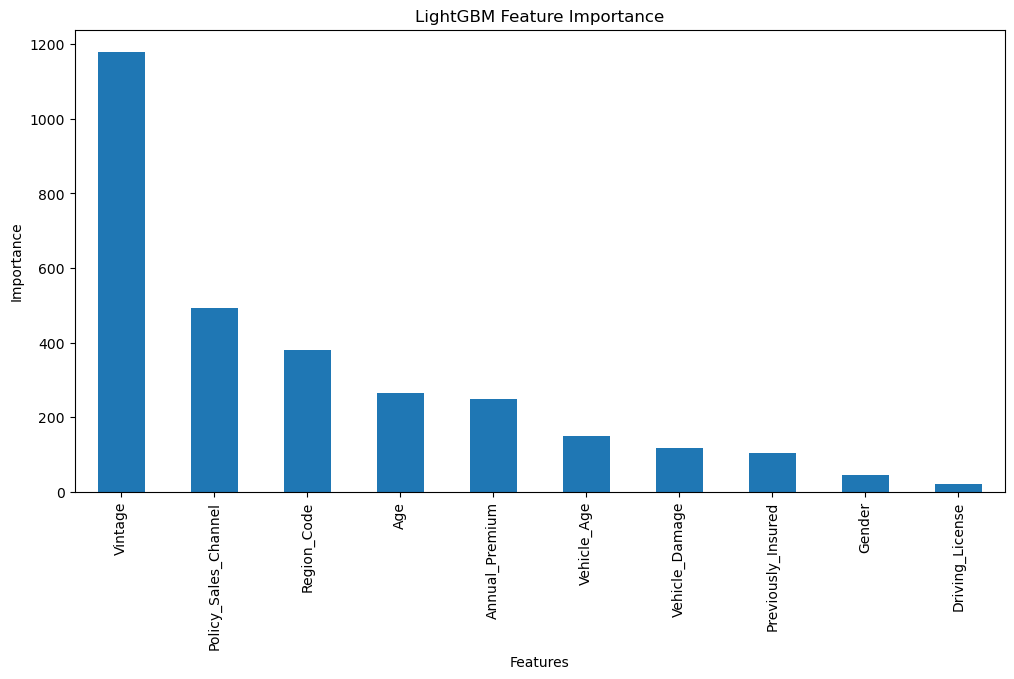

In [19]:
lgbm_importance = pd.Series(lgbm_classifier.feature_importances_, index=X.columns)
lgbm_importance.sort_values(ascending=False).plot.bar(figsize=(12,6))
plt.title('LightGBM Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [20]:
lgbm_predictions_test = lgbm_classifier.predict_proba(X_test)[:, 1]


In [22]:
result = pd.DataFrame({'id': test_ids, 'Response': lgbm_predictions_test.flatten()})
result.to_csv("submission6.csv", index=False)